## 1. CSS表达式
    实际是一种选择html元素的语法
        前面看到了根据id，class，tag名来选择元素
    这时我们可以使用一种更为强大的 CSS selector 语法来选择元素

## 2. CSS 语法选择元素原理
    HTML 中 经常要显示元素的 某些特殊效果，比如文字颜色是红色，背景是黑色，字体是宋体，等等
        CSS 必须告诉 浏览器，要选择 那些元素，然后什么样的显示风格
            比如以下的文字，为什么会是红色的
    下面蓝色框框的，就是CSS表达式
        其中 .animal 为选择器
            花括号其中的内容为，具体的选择
            
     选择器，就是告诉浏览器要显示哪些元素
         后面部分为 选择元素的 装饰效果
        
### 了解CSS 选择器的效果后
    selenium 就能够反向利用，通过 .animal 这样的 css 选择器来说明明需要获取哪些元素
    
    使用 CSS 选择器几乎可以完成所有的 web 自动化，因此非常非常重要
    
        .内容，内容表示class属性值，对有所class属性值为animal，都变为红色

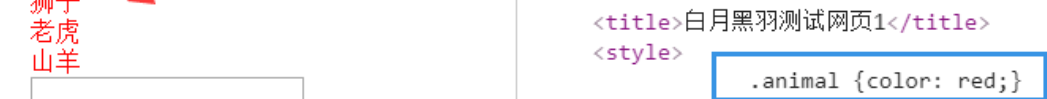

In [1]:
# selenium 通过CSS选择器获取 elments 示例
from selenium import webdriver
from selenium.webdriver.common.by import By

wd = webdriver.Chrome()

wd.get('https://cdn2.byhy.net/files/selenium/sample1.html')

# 在网站中，直接选择了包含 searchtext的属性值
    # 目前的个人疑惑，是否通过CSS选择器，可以获得任意对应文本包括属性 的 elements
        # 下面的＃代表选择 的是 id属性值
element = wd.find_element(By.CSS_SELECTOR, '#searchtext')
element.send_keys('你好')

In [ ]:
# 选择class的属性值为特定方法
elements = wd.find_elements(By.CLASS_NAME, 'animal')
elements = wd.find_elements(By.CSS_SELECTOR, '.animal')
# 以上两种方法均可以，可以注意到，使用CSS_SELECTOR, 其中.表示 属性class
    # css 选择器在html中的功能也是这样实现的

### css表达式，确定条件后，筛选具体元素的层级

选择子元素与后代元素

    如果是直接子元素，就叫做直接子元素，或者直接后代元素
        只要是子元素，就叫做子元素，或者后代元素
    那么直接子元素一定是子元素，或者一定是后代元素
    但后代元素不一定是直接子元素
    
目的是限制范围，例如

    #ok > .plant 
    如果只有 .plant 那就是选择 class属性值 为 plant 的元素
        但是加上了#ok > ，就是要求，该元素必须是一个 id值为 ok 的直接子元素
       
因此可以利用这种方法来做层级筛选，获得特定的子元素

    1.比如 元素1 > 元素2 > 元素3 > 元素4
        以上每个元素n，代表该元素的某个属性值条件
    并且明显，最后获取的只能是 元素4
        能过滤到一大波不符合条件的元素


    2. 如果中间用一个或多个空格隔开，此时就表明，限制条件之间并不要求为直接子元素，只要是子元素就可以
        元素1   元素2   元素3  元素4
        
        元素1   元素2 > 元素3  元素4 
            这一个就是中间 2 3必须是直接子元素关系，其他可以为 跳跃式
            
### 对于CSS 选择器，如果前面没有加特殊符号，比如div，表明直接选取tag名，而非属性值
###     如果这么定义，是否可以理解任何一个元素都有所有的属性，只是没显示出来
###         因此如果要选择元素，属性并不能作为选择标准，然而tag与属性值可以作为选择标准
####            ------
####              回来补充，实际属性也可以，但就是属性值查找的一个特例 比如 [herf=]

由于 class 与 id 两种属性非常常见，因此 css 专门为其提供了两种语法 表示 #表示用id属性值，.表示用class属性值
    
    那么对于其他的属性名，该如何选择，对于其他的属性对应的属性值，一般是用 []
            比如 [class='animal'] 等同于 .animal
                 [herf='1245'] 表明筛选 herf属性的值为'1245'的值

那么如果去掉等号=后面的东西
    
    [herf=] 此时表明只要有这个属性就符合条件

还可以跟其他的条件进行混用
   
    比如 div[class='SKnet']
        表明 div tag值，同时其属性class的值必须为SKnet
    如果 .plant[name='SKnet']
        其中class属性值为plant，name属性值为SKnet
         如果加上了空格，表示两个属性条件 .plant [name='SKnet']